# **Text Mining. Data Base: Twitter US Airline Sentiment**

# *Bianca Finol*

In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\LENOVO\\Documents\\SENECA-BUSINESS ANALITICS PG\\2do Semestre\\BAN200-Sentiment analysis and Text Mining\\Python practices'

In [3]:
train=pd.read_csv('Tweets.csv')

**Number of Words**

In [4]:
train['word_count'] = train['text'].apply(lambda x: len(str(x).split(" ")))
train[['text','word_count']].head()

,text,word_count
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials t...,9
2,@VirginAmerica I didn't today... Must mean I n...,12
3,@VirginAmerica it's really aggressive to blast...,17
4,@VirginAmerica and it's a really big bad thing...,10


In [5]:
# Number of characters: This feature is also based on the previous feature intuition. 
# Here, we calculate the number of characters in each tweet. This is done by calculating the length of the tweet.

In [6]:
train['char_count'] = train['text'].str.len() ## this also includes spaces
train[['text','char_count']].head()

,text,char_count
0,@VirginAmerica What @dhepburn said.,35
1,@VirginAmerica plus you've added commercials t...,72
2,@VirginAmerica I didn't today... Must mean I n...,71
3,@VirginAmerica it's really aggressive to blast...,126
4,@VirginAmerica and it's a really big bad thing...,55


In [7]:
# Average Word Length: We will also extract another feature which will calculate the average word length of each tweet. 
# This can also potentially help us in improving our model.

In [8]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['text'].apply(lambda x: avg_word(x))
train[['text','avg_word']].head()

,text,avg_word
0,@VirginAmerica What @dhepburn said.,8.000000
1,@VirginAmerica plus you've added commercials t...,7.111111
2,@VirginAmerica I didn't today... Must mean I n...,5.000000
3,@VirginAmerica it's really aggressive to blast...,6.470588
4,@VirginAmerica and it's a really big bad thing...,4.600000


In [9]:
# Number of stopwords: Generally, while solving an NLP problem, the first thing we do is to remove the stopwords. 
# But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['text','stopwords']].head()

,text,stopwords
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,3
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,6
4,@VirginAmerica and it's a really big bad thing...,5


**Lower Case**: This pre-processing step will transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [11]:
train['text'] = train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['text'].head()

0                  @virginamerica what @dhepburn said.
1    @virginamerica plus you've added commercials t...
2    @virginamerica i didn't today... must mean i n...
3    @virginamerica it's really aggressive to blast...
4    @virginamerica and it's a really big bad thing...
Name: text, dtype: object

**Removing Punctuation**: Removing all it will help us reduce the size of the training data

In [12]:
train['text'] = train['text'].str.replace('[^\w\s]','')
train['text'].head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

**Removal of Stop Words**: 

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['text'].head()

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercials exp...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: text, dtype: object

**Top 10 most frequent words**

In [14]:
freq = pd.Series(' '.join(train['text']).split()).value_counts()[:10]
freq

united          4143
flight          3873
usairways       3051
americanair     2957
southwestair    2452
jetblue         2361
get             1334
thanks          1072
cancelled       1056
service          956
dtype: int64

**Tokenization**

In [15]:
from textblob import TextBlob
TextBlob(train['text'][1]).words

WordList(['virginamerica', 'plus', 'youve', 'added', 'commercials', 'experience', 'tacky'])

**Creating a Word Cloud**

In [16]:
import wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [17]:
data= pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
text=data['text']
text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [19]:
data.shape

(14640, 15)

In [20]:
wordcloud = WordCloud(font_path= ('Peachy Mochi.ttf'), width = 800, height = 800,
                background_color ='red',
                min_font_size = 10,
                max_words=10).generate(str(text))

In [21]:
import matplotlib.pyplot as plt

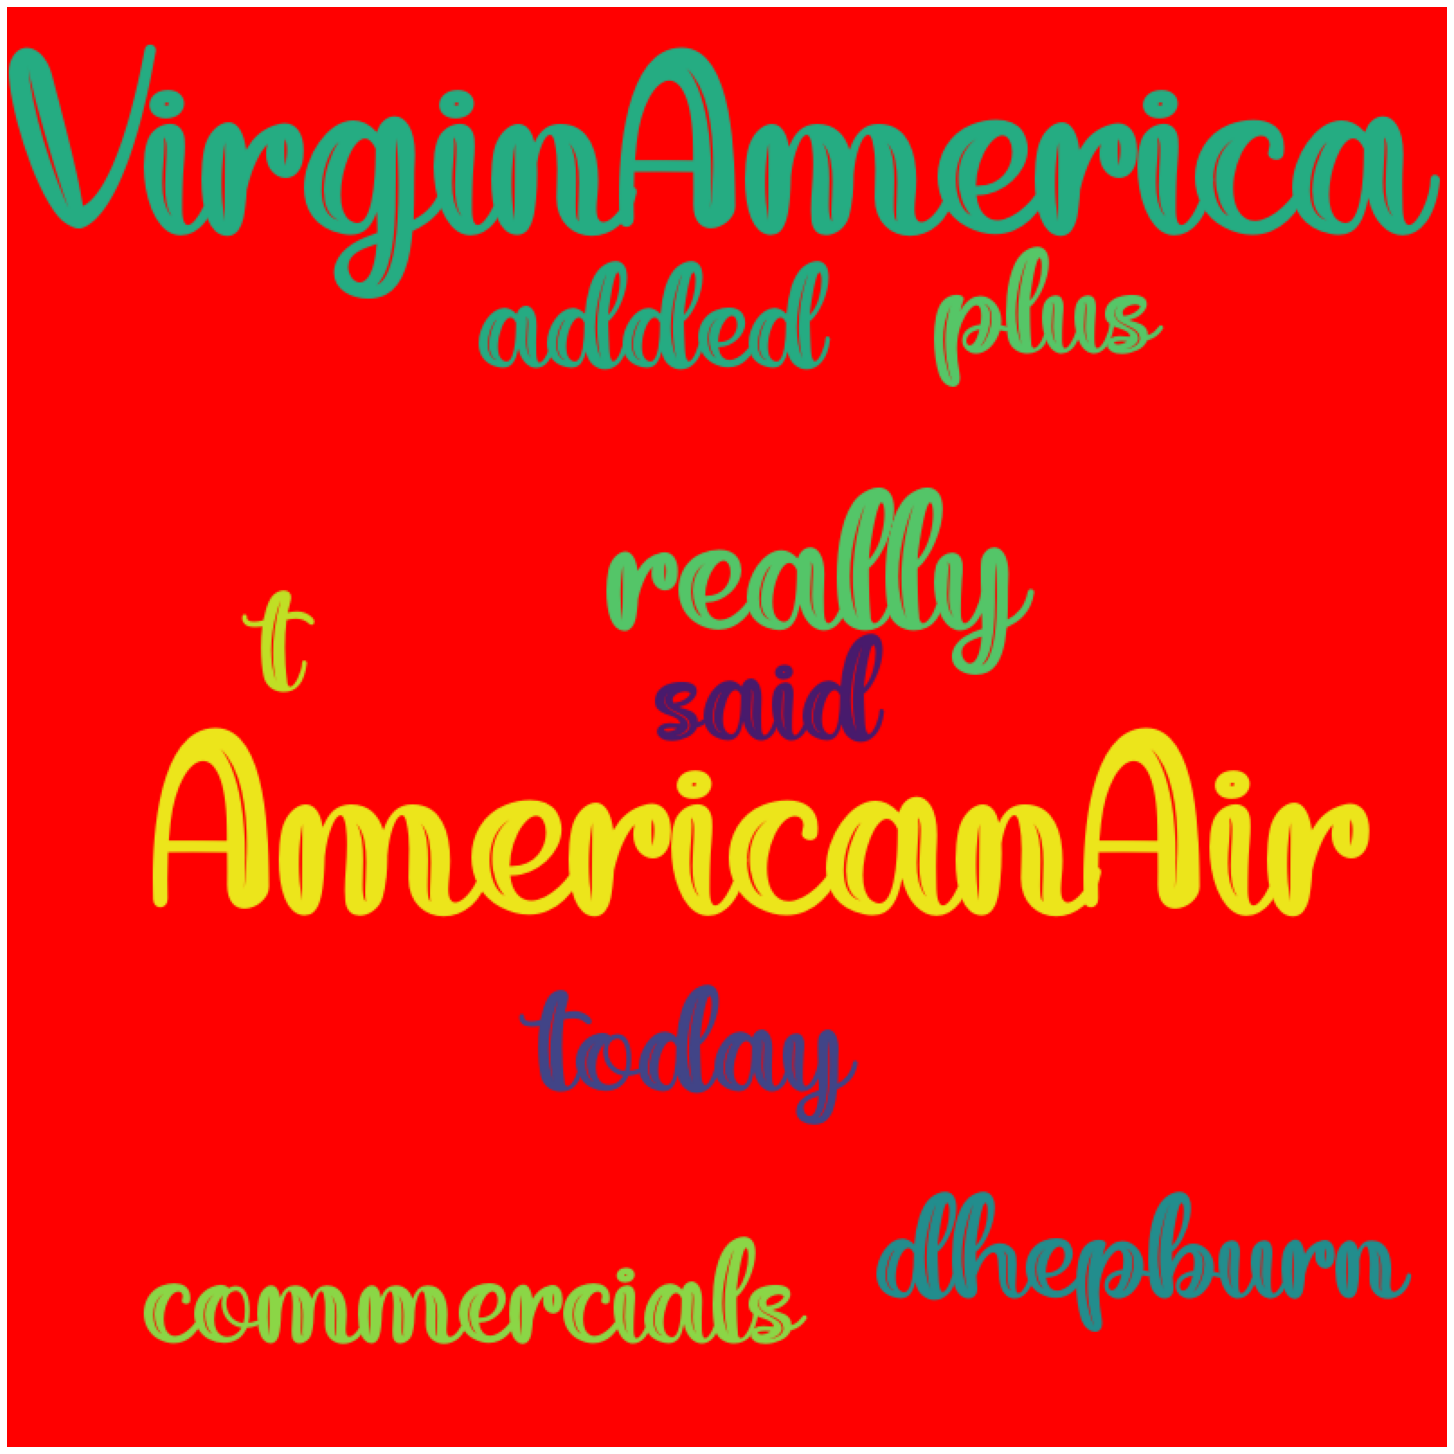

In [22]:
plt.figure(figsize = (20, 20), facecolor = 'None')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [23]:
wordcloud = WordCloud(font_path= ('Peachy Mochi.ttf'), width = 800, height = 800,
          background_color ='white',
                min_font_size = 10,
                max_words=10000).generate(str(text))

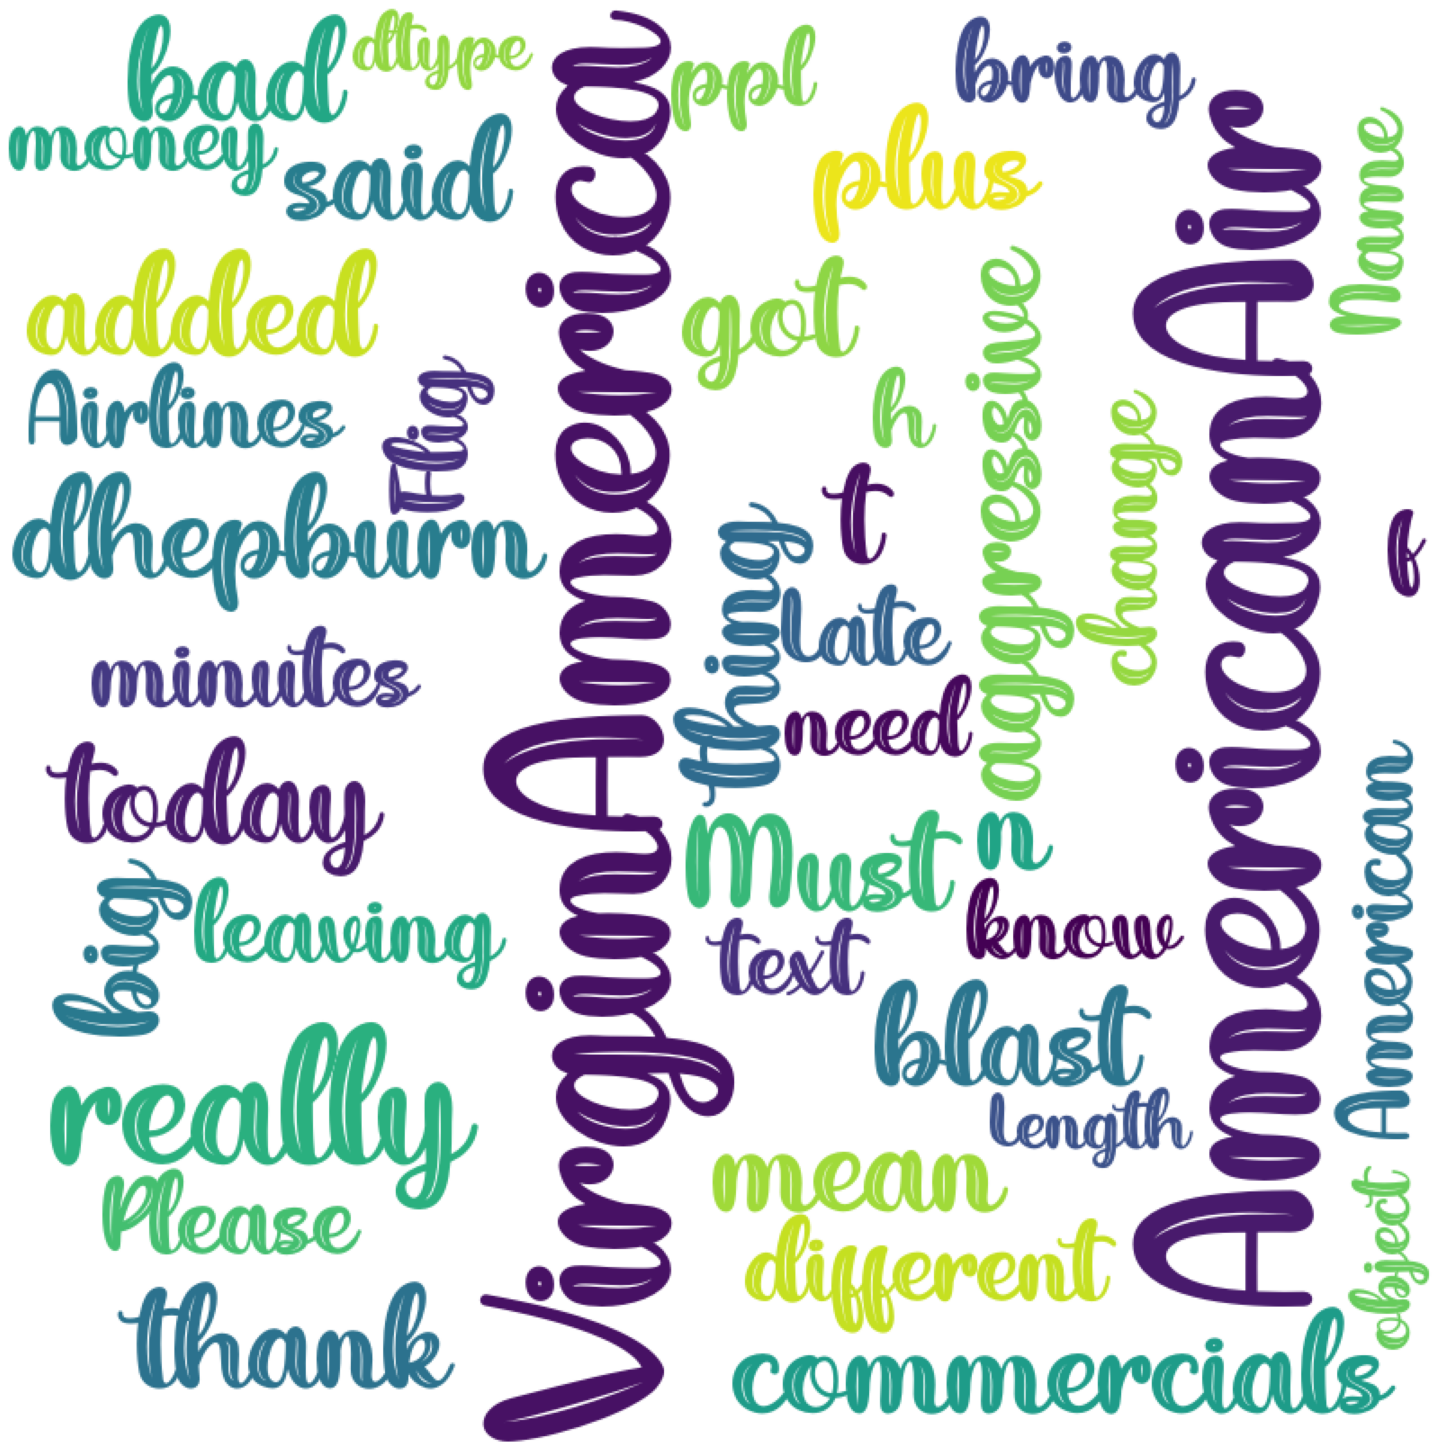

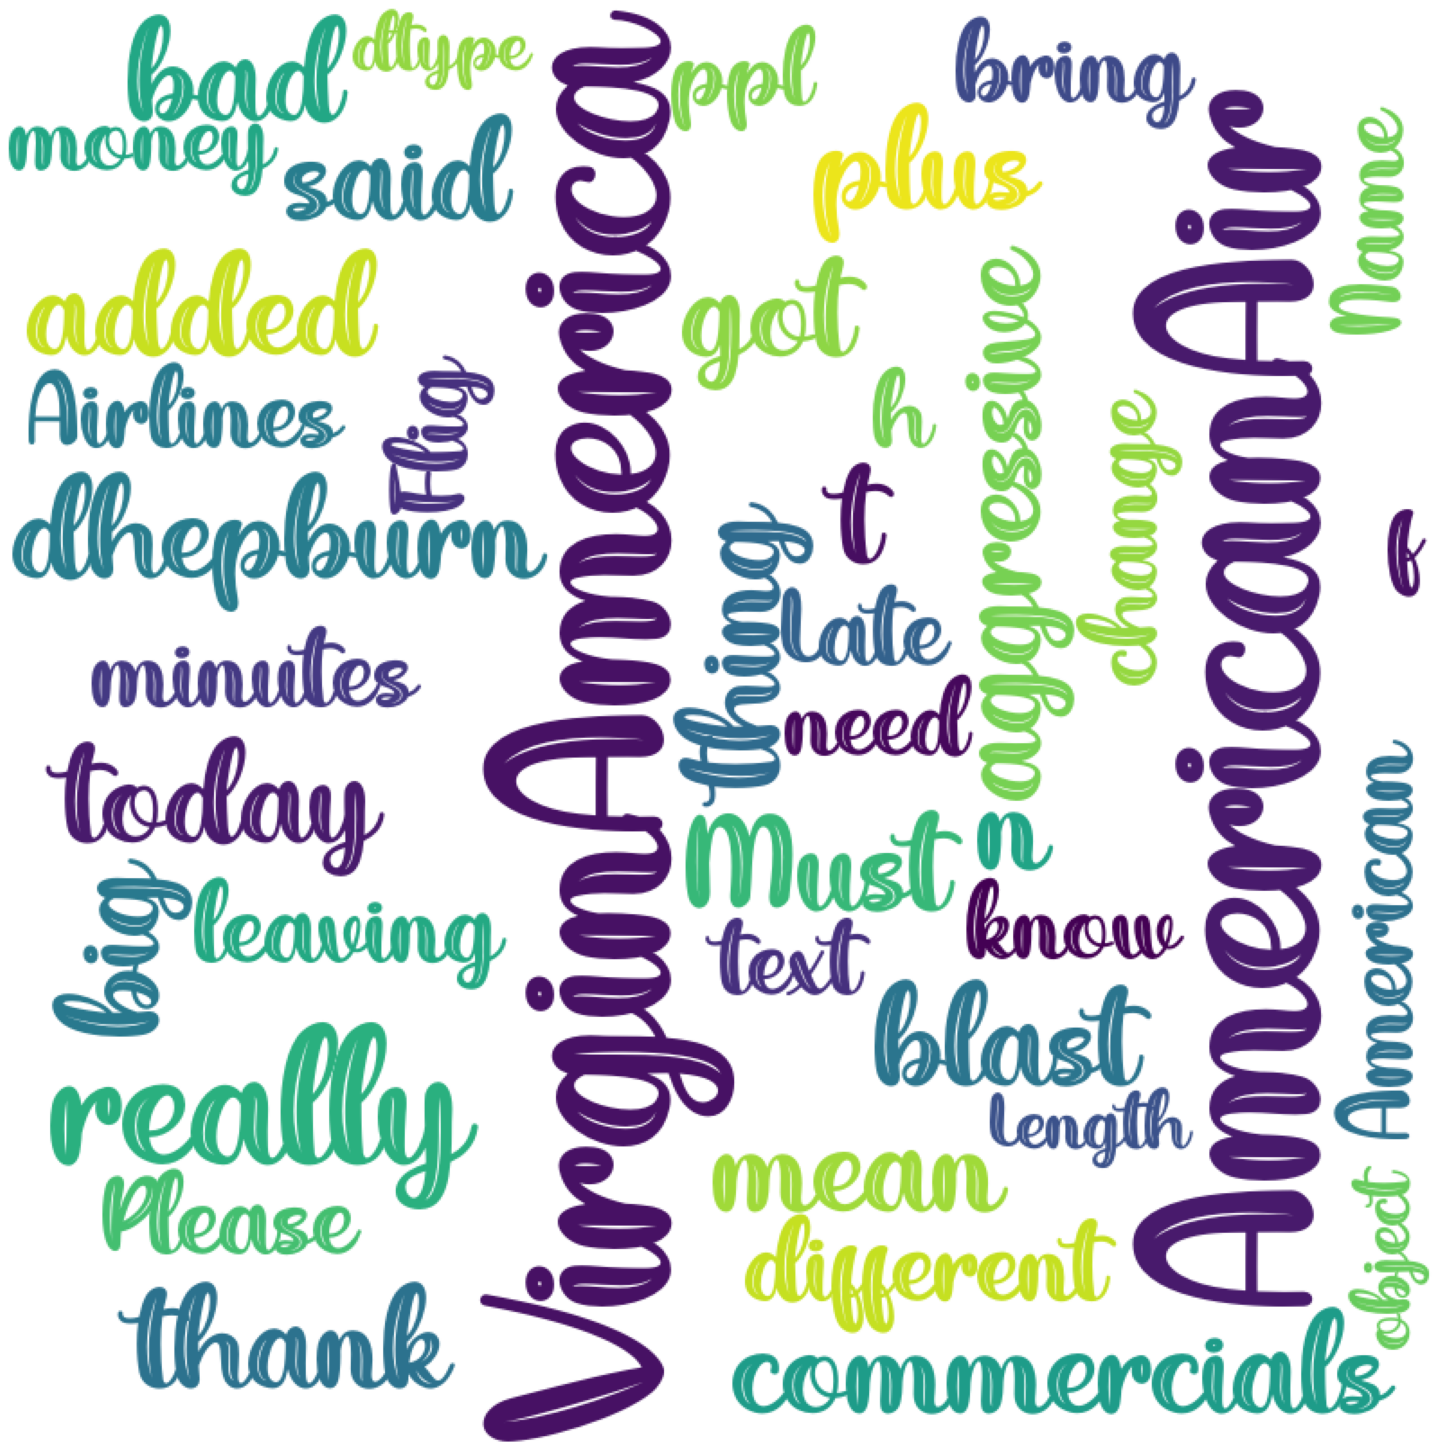

In [24]:
plt.figure(figsize = (20, 20), facecolor = 'None')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.figure(figsize = (20, 20), facecolor = 'None')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()
  
plt.show()

## Adding shape to wordcloud

In [25]:
text=data['text']
text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [26]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [27]:
mask = np.array(Image.open("paj2.jpg"))
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

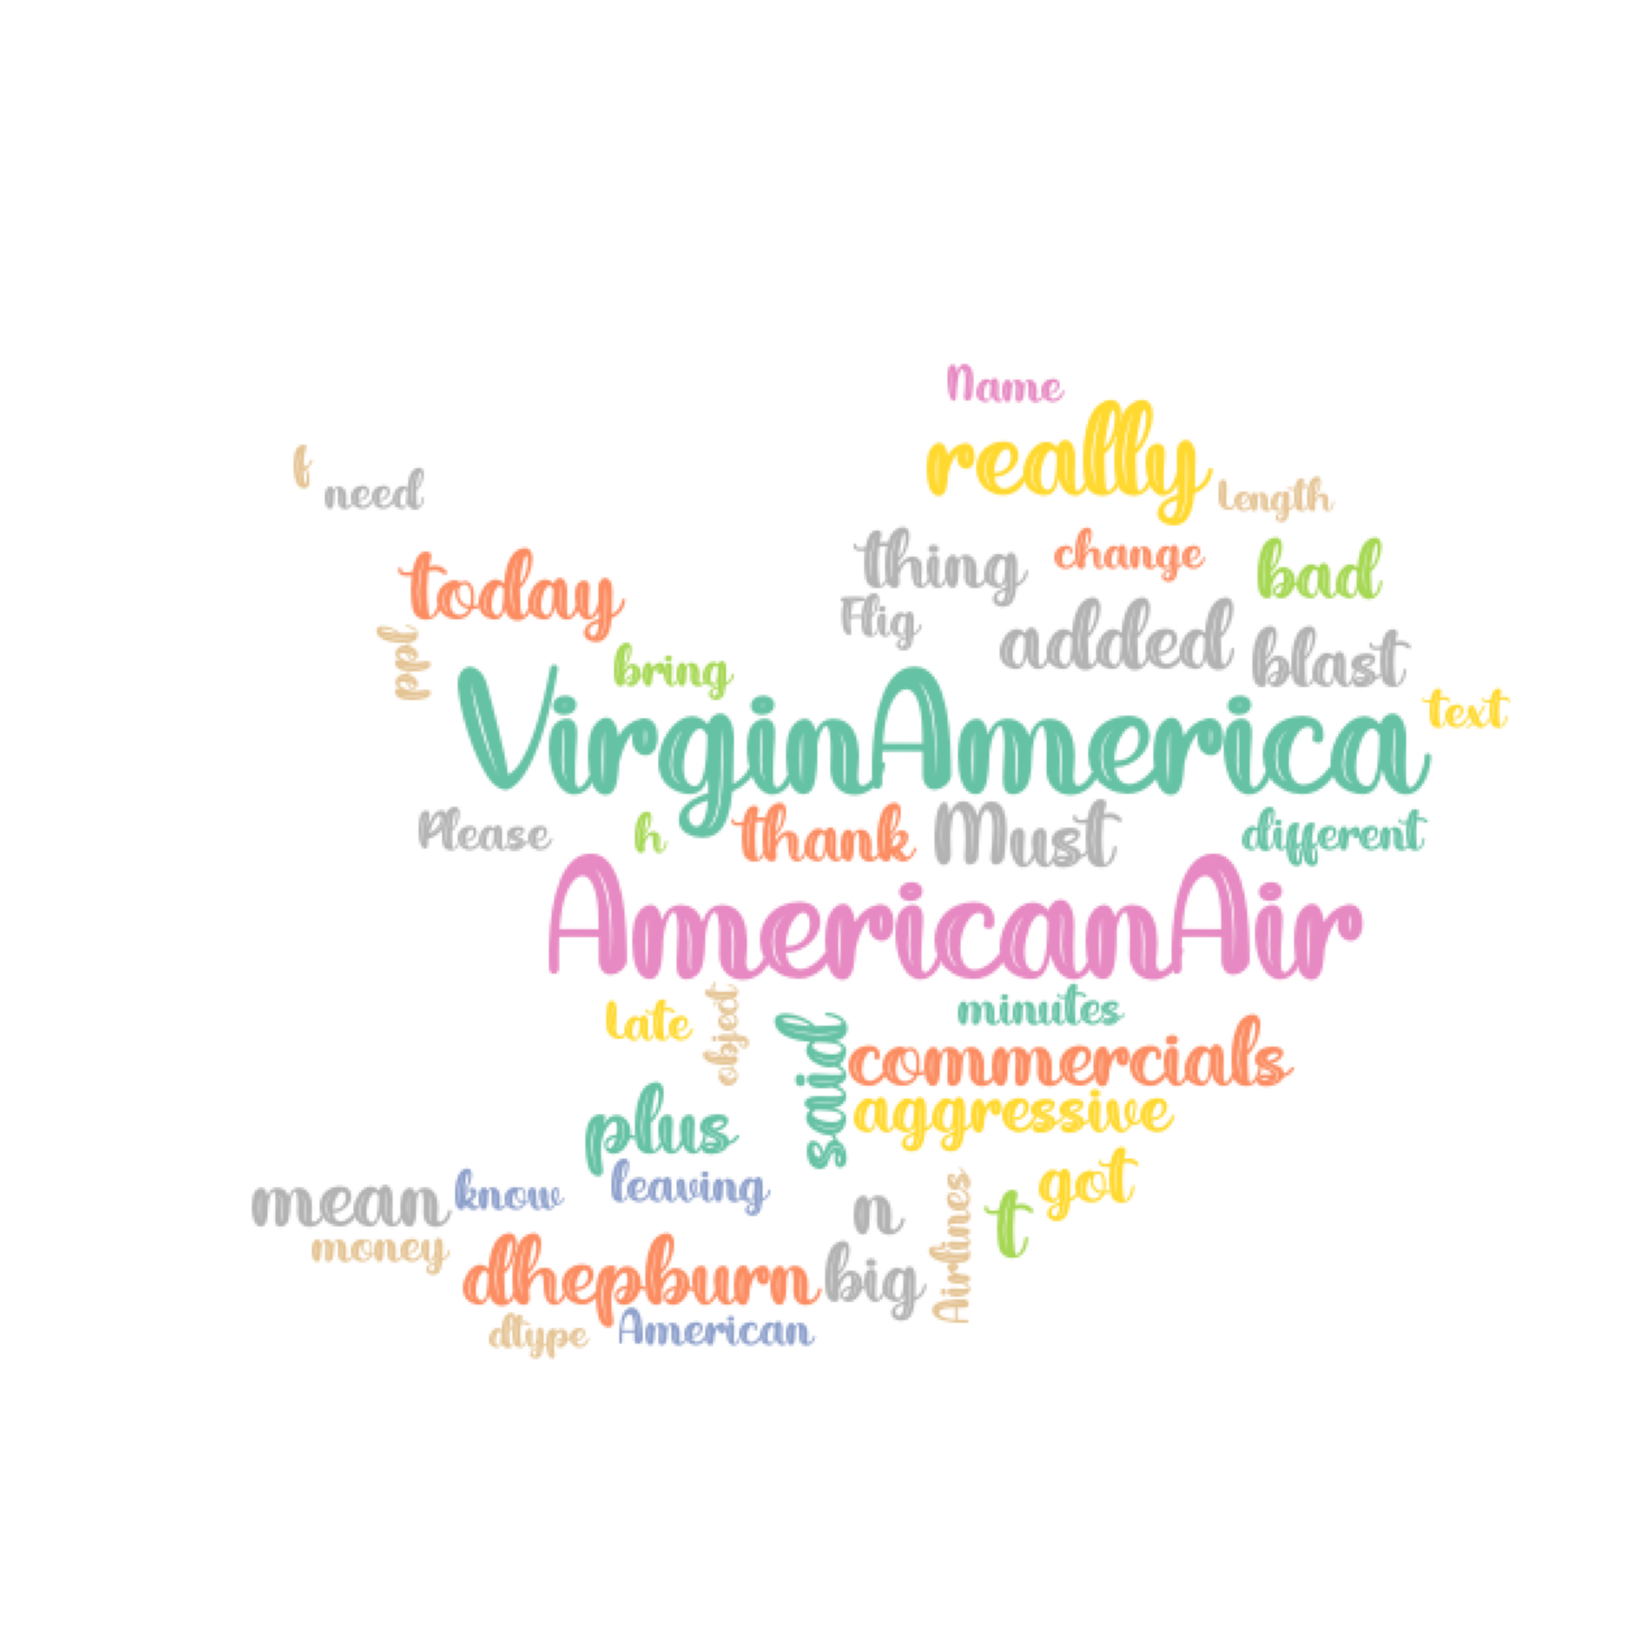

In [28]:
wordcloud = WordCloud(font_path= ('Peachy Mochi.ttf'), width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, 
                      mask=mask).generate(str(text))
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
plot_cloud(wordcloud)